In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
## importing the data
flight_data = pd.read_csv(r"C:\Users\moham\Downloads\Clean_Dataset.csv (1)\Clean_Dataset.csv")

In [3]:
flight_data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
flight_data.duplicated().sum()

0

In [6]:
flight_data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
##dropping the unnamed column since its of no use
flight_data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [8]:
#doing a granular level analysis on the data inside each column
for i in flight_data.columns:
    print(i)
    print(set(list(flight_data[i])))
    print("***********************************************************")

airline
{'GO_FIRST', 'Air_India', 'AirAsia', 'Indigo', 'SpiceJet', 'Vistara'}
***********************************************************
flight
{'G8-399', '6E-132', '6E-212', 'G8-286', '6E-2939', 'AI-651', '6E-524', 'G8-503', '6E-2769', '6E-574', '6E-6293', 'G8-108', '6E-176', 'I5-5405', '6E-6567', 'G8-199', 'I5-830', 'SG-5012', 'SG-5079', '6E-2015', 'G8-404', '6E-7156', '6E-5087', '6E-5018', 'G8-334', 'G8-2401', '6E-2062', '6E-134', 'AI-868', 'SG-8263', 'I5-339', '6E-425', '6E-5012', '6E-2031', 'SG-8253', '6E-5302', '6E-5207', 'I5-768', '6E-871', 'SG-8158', '6E-822', '6E-5337', '6E-6278', '6E-827', 'I5-1517', 'SG-649', 'SG-5073', 'SG-2277', '6E-2188', 'AI-9881', 'SG-8723', '6E-6186', 'UK-873', 'G8-209', 'UK-653', 'G8-7541', 'AI-603', '6E-2057', 'SG-679', '6E-296', 'UK-867', '6E-533', '6E-5063', '6E-5307', 'G8-302', '6E-7288', 'I5-1566', 'AI-620', 'UK-910', '6E-6463', '6E-489', '6E-995', 'UK-747', 'UK-955', '6E-321', 'I5-821', 'AI-877', 'SG-8195', 'AI-887', 'G8-7553', 'G8-1010', 'G8-3

In [9]:
## encoding the object types

flight_data.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [10]:
### 1 airline
flight_data['airline'].value_counts()
airlines = flight_data['airline']
airlines

0         SpiceJet
1         SpiceJet
2          AirAsia
3          Vistara
4          Vistara
            ...   
300148     Vistara
300149     Vistara
300150     Vistara
300151     Vistara
300152     Vistara
Name: airline, Length: 300153, dtype: object

In [11]:
flight_data['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [12]:
airlines = pd.get_dummies(airlines,drop_first=True,dtype='int64')

In [13]:
airlines

,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
300148,0,0,0,0,1
300149,0,0,0,0,1
300150,0,0,0,0,1
300151,0,0,0,0,1


In [14]:
## 2 flight
flight_data['flight'].value_counts()

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64

In [15]:
flight_data['flight'].nunique()
##flight is not a significant column for us so droppoing it 
flight_data.drop(['flight'],axis=1,inplace=True)

In [16]:
flight_data.dtypes

airline              object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [17]:
### 3 source_city
flight_data['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [18]:
source_cities = flight_data['source_city']
source_cities

0           Delhi
1           Delhi
2           Delhi
3           Delhi
4           Delhi
           ...   
300148    Chennai
300149    Chennai
300150    Chennai
300151    Chennai
300152    Chennai
Name: source_city, Length: 300153, dtype: object

In [19]:
source_cities = pd.get_dummies(source_cities ,drop_first=True,dtype='int64' )

In [20]:
source_cities

,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
300148,1,0,0,0,0
300149,1,0,0,0,0
300150,1,0,0,0,0
300151,1,0,0,0,0


In [21]:
flight_data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [22]:
### 4 departure_time
flight_data['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [23]:
departure_times = flight_data['departure_time']
departure_times

0               Evening
1         Early_Morning
2         Early_Morning
3               Morning
4               Morning
              ...      
300148          Morning
300149        Afternoon
300150    Early_Morning
300151    Early_Morning
300152          Morning
Name: departure_time, Length: 300153, dtype: object

In [24]:
departure_times = pd.get_dummies(departure_times,drop_first=True,dtype='int64')

In [25]:
departure_times

,Early_Morning,Evening,Late_Night,Morning,Night
0,0,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
300148,0,0,0,1,0
300149,0,0,0,0,0
300150,1,0,0,0,0
300151,1,0,0,0,0


In [26]:
#### 5 stops
flight_data['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [27]:
stops_ = flight_data['stops']

In [28]:
stops_ = pd.get_dummies(stops_,drop_first=True,dtype='int64')

In [29]:
stops_ 

,two_or_more,zero
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
300148,0,0
300149,0,0
300150,0,0
300151,0,0


In [31]:
#arrival_time	destination_city	class

In [33]:
# 6 arrival_time
flight_data['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [35]:
arrival_timings = flight_data['arrival_time']

In [37]:
arrival_timings = pd.get_dummies(arrival_timings,drop_first=True,dtype='int64')

In [39]:
arrival_timings

,Early_Morning,Evening,Late_Night,Morning,Night
0,0,0,0,0,1
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
300148,0,1,0,0,0
300149,0,0,0,0,1
300150,0,0,0,0,1
300151,0,1,0,0,0


In [41]:
### 7 destination_city
flight_data['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [43]:
destination_cities=flight_data['destination_city']

In [45]:
destination_cities = pd.get_dummies(destination_cities,drop_first=True,dtype='int64')

In [47]:
destination_cities

,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
300148,0,0,1,0,0
300149,0,0,1,0,0
300150,0,0,1,0,0
300151,0,0,1,0,0


In [49]:
### 8 class
flight_data['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [51]:
flight_data['class'] = np.where(flight_data['class']=="Business",1,0)


In [53]:
flight_data['class'].value_counts()

class
0    206666
1     93487
Name: count, dtype: int64

In [55]:
##
flight_data.dtypes

airline              object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                 int32
duration            float64
days_left             int64
price                 int64
dtype: object

In [59]:
flight_data = pd.concat([flight_data,airlines,source_cities,destination_cities,arrival_timings,stops_ ,departure_times],axis=1)

In [61]:
flight_data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,Late_Night,Morning,Night,two_or_more,zero,Early_Morning,Evening,Late_Night,Morning,Night
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,0,2.17,1,5953,...,0,0,1,0,1,0,1,0,0,0
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953,...,0,1,0,0,1,1,0,0,0,0
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956,...,0,0,0,0,1,1,0,0,0,0
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955,...,0,0,0,0,1,0,0,0,1,0
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,0,2.33,1,5955,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,1,10.08,49,69265,...,0,0,0,0,0,0,0,0,1,0
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,1,10.42,49,77105,...,0,0,1,0,0,0,0,0,0,0
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,1,13.83,49,79099,...,0,0,1,0,0,1,0,0,0,0
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,1,10.00,49,81585,...,0,0,0,0,0,1,0,0,0,0


In [65]:
##dropping the columns which have ben encoded whihc have the oh=bjetc data type
flight_data.drop(['airline' , 'source_city',	'departure_time',	'stops',	'arrival_time',	'destination_city'],axis=1,inplace=True)

In [67]:
flight_data

,class,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,Chennai,...,Late_Night,Morning,Night,two_or_more,zero,Early_Morning,Evening,Late_Night,Morning,Night
0,0,2.17,1,5953,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
1,0,2.33,1,5953,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,0
2,0,2.17,1,5956,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,2.25,1,5955,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,2.33,1,5955,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,10.08,49,69265,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
300149,1,10.42,49,77105,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
300150,1,13.83,49,79099,0,0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,0
300151,1,10.00,49,81585,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0


In [69]:
###seperating the independent and dependent varibales 
flight_data_ind = flight_data.drop(['price'],axis=1)

In [71]:
flight_data_ind

,class,duration,days_left,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,Chennai,Delhi,...,Late_Night,Morning,Night,two_or_more,zero,Early_Morning,Evening,Late_Night,Morning,Night
0,0,2.17,1,0,0,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
1,0,2.33,1,0,0,0,1,0,0,1,...,0,1,0,0,1,1,0,0,0,0
2,0,2.17,1,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
3,0,2.25,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
4,0,2.33,1,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,10.08,49,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
300149,1,10.42,49,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
300150,1,13.83,49,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
300151,1,10.00,49,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [73]:
##
flight_data_dep = flight_data['price']

In [75]:
flight_data_dep

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [79]:
correlation = flight_data.corr().round(4)
correlation

,class,duration,days_left,price,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,Chennai,...,Late_Night,Morning,Night,two_or_more,zero,Early_Morning,Evening,Late_Night,Morning,Night
class,1.0000,0.1387,-0.0130,0.9379,0.1249,-0.1945,-0.2755,-0.1183,0.3021,0.0102,...,-0.0862,0.0397,0.0080,-0.1069,-0.0689,-0.0121,0.0108,-0.0294,0.0028,0.0495
duration,0.1387,1.0000,-0.0392,0.2042,0.2773,-0.1394,-0.3660,0.0088,0.1324,0.0331,...,-0.1073,0.1229,-0.0645,0.0926,-0.5149,-0.0471,0.1040,-0.0450,-0.0711,0.1155
days_left,-0.0130,-0.0392,1.0000,-0.0919,-0.0227,0.0304,0.0078,-0.0244,-0.0070,0.0026,...,0.0265,-0.0036,-0.0046,-0.0186,-0.0013,0.0033,-0.0102,0.0120,-0.0032,0.0040
price,0.9379,0.2042,-0.0919,1.0000,0.0700,-0.1942,-0.2809,-0.1140,0.3608,0.0187,...,-0.0936,0.0304,0.0203,-0.0642,-0.1873,-0.0122,0.0079,-0.0338,0.0182,0.0418
Air_India,0.1249,0.2773,-0.0227,0.0700,1.0000,-0.1757,-0.2488,-0.1069,-0.5232,-0.0116,...,-0.0599,0.0667,-0.0019,-0.0037,-0.0761,0.0337,0.0197,-0.0070,-0.0248,0.0107
GO_FIRST,-0.1945,-0.1394,0.0304,-0.1942,-0.1757,1.0000,-0.1185,-0.0509,-0.2492,-0.0633,...,0.1004,-0.0639,-0.0004,-0.0377,0.0170,0.0284,-0.0037,0.0086,-0.0404,-0.0254
Indigo,-0.2755,-0.3660,0.0078,-0.2809,-0.2488,-0.1185,1.0000,-0.0721,-0.3528,0.0336,...,0.0650,-0.0828,-0.0093,-0.0541,0.1767,-0.0322,-0.0206,0.0777,0.0284,-0.0724
SpiceJet,-0.1183,0.0088,-0.0244,-0.1140,-0.1069,-0.0509,-0.0721,1.0000,-0.1516,0.0033,...,0.0033,0.0308,0.0133,-0.0379,0.0830,0.0339,0.0036,-0.0116,-0.0283,0.0052
Vistara,0.3021,0.1324,-0.0070,0.3608,-0.5232,-0.2492,-0.3528,-0.1516,1.0000,0.0312,...,-0.1352,0.0303,0.0249,0.0248,-0.1053,-0.0362,-0.0050,-0.0569,0.0570,0.0425
Chennai,0.0102,0.0331,0.0026,0.0187,-0.0116,-0.0633,0.0336,0.0033,0.0312,1.0000,...,0.0091,-0.0240,0.0044,-0.0006,-0.0266,0.0169,-0.0722,-0.0146,0.0322,0.0369


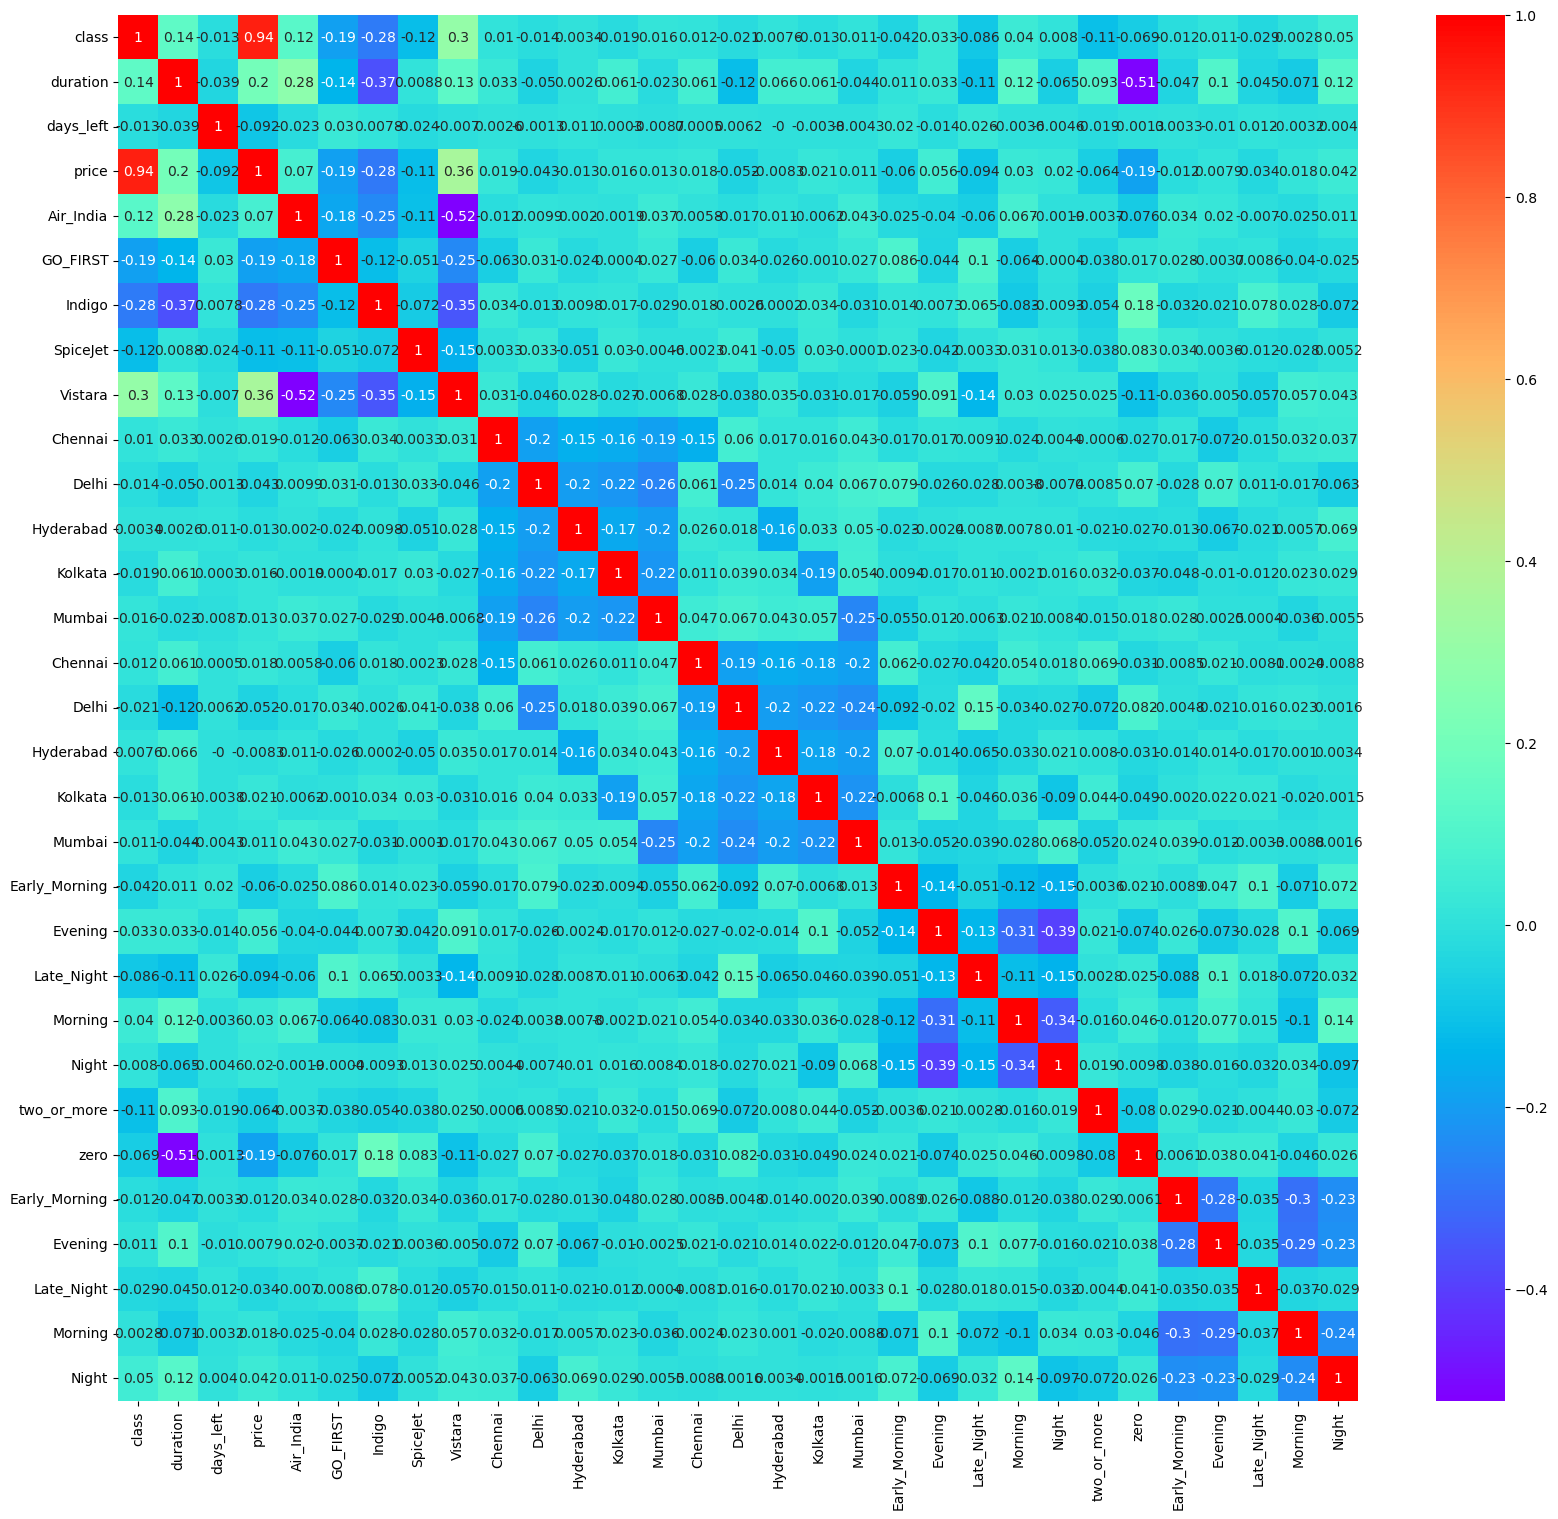

In [87]:
plt.figure(figsize=(20,18))
sns.heatmap(correlation,annot=True,cmap='rainbow')
plt.show()

In [117]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(flight_data_ind ,flight_data_dep,random_state=102)


In [95]:
### building a model
##linear model
from sklearn.linear_model import LinearRegression
linear_mod = LinearRegression().fit(x_train ,y_train)
linear_mod

LinearRegression()

In [97]:
##preidct
linear_mod_train_pred = linear_mod.predict(x_train)
linear_mod_test_pred = linear_mod.predict(x_test)

In [103]:
#evaluate
from sklearn.metrics import r2_score , mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
r2_score_train = r2_score(y_train,linear_mod_train_pred)
r2_score_train

0.9114023808537405

In [105]:
r2_score_test = r2_score(y_test,linear_mod_test_pred)
r2_score_test

0.9116014251684778

In [107]:
### mae
mae_test = mean_absolute_error(y_test,linear_mod_test_pred)
mae_test

4580.929431478667

In [109]:
##mse
mse_test = mean_squared_error(y_test,linear_mod_test_pred)
mse_test

45789458.4946501

In [137]:
### using rfe 
from sklearn.feature_selection import RFE
linear_mod_rfe = RFE(linear_mod,n_features_to_select=18).fit(x_train , y_train)
linear_mod_rfe

RFE(estimator=LinearRegression(), n_features_to_select=18)

In [138]:
linear_mod_rfe.n_features_ 

18

In [139]:
linear_mod_rfe.feature_names_in_ 

array(['class', 'duration', 'days_left', 'Air_India', 'GO_FIRST',
       'Indigo', 'SpiceJet', 'Vistara', 'Chennai', 'Delhi', 'Hyderabad',
       'Kolkata', 'Mumbai', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata',
       'Mumbai', 'Early_Morning', 'Evening', 'Late_Night', 'Morning',
       'Night', 'two_or_more', 'zero', 'Early_Morning', 'Evening',
       'Late_Night', 'Morning', 'Night'], dtype=object)

In [140]:
##predict
linear_mod_rfe_pred_train = linear_mod_rfe.predict(x_train)
linear_mod_rfe_pred_tesy  = linear_mod_rfe.predict(x_test)

In [141]:
##evaluate 
r2_Score_train_rfe = r2_score(y_train ,linear_mod_rfe_pred_train )
r2_Score_train_rfe

0.9047168286068914

In [142]:
r2_Score_test_rfe = r2_score(y_test ,linear_mod_rfe_pred_tesy )
r2_Score_test_rfe

0.9052605225889031

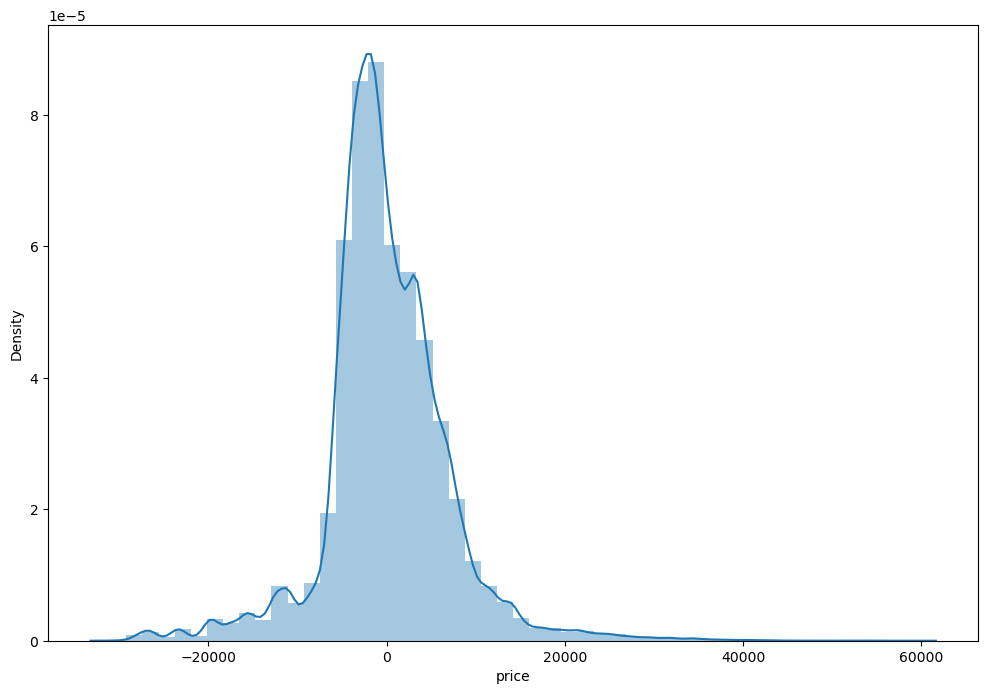

In [143]:
plt.figure(figsize=(12,8))
sns.distplot(y_test -linear_mod_rfe_pred_tesy)
plt.show()